<a href="https://colab.research.google.com/github/Mrfrktmrck19/Data_Science/blob/master/Manipulation/DataPreProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns

# Veri Ön İşleme


Konu Başlıkları:
* Genel Bakış. Veri Ön İşlemede bir çok teknik var, bunlara kısaca değineceğiz.
* Aykırı Gözlem Analizi. 
* Eksik Gözlem Analizi.
* Standartlaştırma
* Değişken Dönüşümleri


Veri Ön İşleme, Makine Öğrenmesi Modeli kurulmadan önce veri seti üzerinde yapmamız gereken veri tipi dönüştürmeleri, eksik değer sorununun çözümü gibi veri setini modele vermeden önce seti düzenlemeyle ilgili işlemlerdir.

Veri Manipilasyonu, yapacağımız işlemlerde bir araç iken Veri Ön İşleme bir süreçtir! 

## Veri Ön İşlem Genel Bakış

Bir ML modelinin amacı genellenebilir yapılar ortaya koymaktır. Belirli olaylar gözlendiğinde belirli tahmin sonuçlarını vermektedir.

Kabaca bir öğrenme işlemi, önceki senaryoların bilgisayara verilerek durumların öğretilmesi ve ileride karşılaşılacak benzer durumalrda benzer sonuçların çıkması olarak söylenebilir. Bu tanımdan dolayı, Veri Bilimcilerin en büyük geyiği olan "veri mi, model mi" konusu ortaya çıkar. Aşşağıdaki linki okumanı tavsiye ederim.

https://hbr.org/2018/04/if-your-data-is-bad-your-machine-learning-tools-are-useless

İlgileneceğimiz Başlıklar:
* Veri Temizleme (Data Cleaning/Cleasing)
  * Gürültülü Veri (Noisy Data) (Veri setinde bir erkeğin hamile bilgisinin True olması, Bir Peçetenin 1000000 tl olması)
  * Eksik Veri Analizi (Missing Value Analysis)
  * Aykırı Gözlem Analizi (Outlier Analysis)
* Veri Standardizasyonu (Data Standardization, Feature Scaling)
  * 0-1 Dönüşümü (Normalization)
  * z-skoruna Dönüştürme (Standardization)
  * Logaritmik Dönüşüm (Log Transformation)
* Veri İndirgeme (Data Reducing)
  * Gözlem (Observation) Sayısının Azaltılması
  * Değişken (Variable) Sayısının Azaltılması
* Değişken Dönüşümleri (Variable Transformation)
  * Sürekli Değişkenlerde Dönüşümler
  * Kategorik Değişkenlerde Dönüşümler

## Aykırı Gözlem (Outlier)

Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere **Aykırı Gözlem** denir.

Aykırılığı ifade eden nümerik değere **Aykırı Değer** denir.

Aykırı değeri barındıran gözleme **Aykırı Gözlem** denir.

Aykırı gözlem, bizim üzerinde duracağımız önemli bir veri ön işlemesi kısmıdır. Çünkü, genellenebilirlik kaygısı ile oluşturulan kural setlerini ya da fonksiyonlarını yanıltır. Yanlılığa sebep olur.

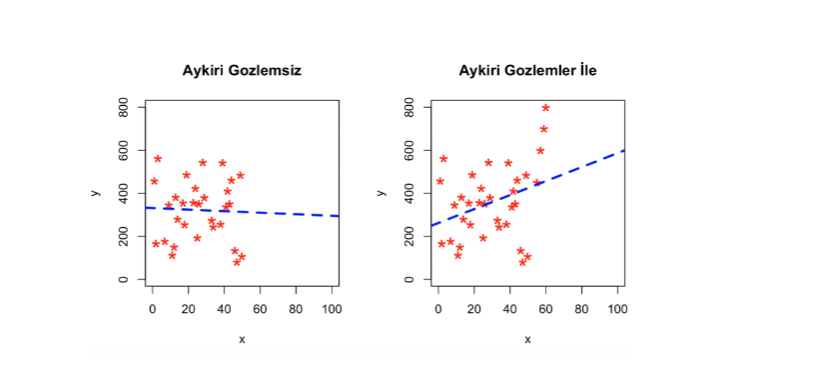

### Aykırı Gözlem Nasıl Tanımlanır? Neye Aykırı Gözlem Deriz?

Aykırı Gözlem, veri setinde genel eğilimin oldukça dışına çıkan gözlemler olduğunu söylemiştik. Peki veri setinin dışına çıkmayı nasıl tanımlarız? 
1. Sektör bilgisi: Örneğin bir ev fiyat tahmin modelinde (özellikle Türkiye'de) 1000 metrekare bir evi modellemeye almamak. Çünkü Makine Öğrenmesi'ndeki amacımız genellenebilir modeller kurmaktır. Türkiye'deki evlerinde çoğu , hatta nerdeyse %99.99; 1000 m2 den küçük olduğu için bu değeri ve daha üstünü dahil etmememiz modelin genellenebilirliği açısından faydalı olacaktır.

2. Standart Sapma Yaklaşımı: Bir değişkenin "ortalamasının" üzerine aynı değişkenin "standart sapması" hesaplanarak eklenir. Bu değer bir "Eşik Değer" gibi düşünülür ve bu değerden az ya da daha fazla olanalr Aykırı Gözlem olarak değerlendirilir. Not: Standart Sapmayı1,2 ya da 3 ile çarparak aralığı arttırıldığı da olur. O an ki USe-case'e bağlı karar verilir.

Eşik Değer = Ortalama + (1 x Standart Sapma) <br>
Eşik Değer = Ortalama + (2 x Standart Sapma) <br>
Eşik Değer = Ortalama + (3 x Standart Sapma) <br>

Örn: Ortalama 100_000, standart sapma 20_000 olan bir araç veri seti için: <br>
Eşik Değer = 100_000 + 1 x 20_000 => 120 ile 80 <br>
Eşik Değer = 100_000 + 2 x 20_000 => 60 ile 140 <br>
Eşik Değer = 100_000 + 3 x 20_000 => 40 ile 160 arasında ayarlanabilir. <br>

3. Z-Skoru Yaklaşımı: Ortalamasını 0, standart sapmasını 1 olarak ayarlamak. Standart sapma ve ortalamayı kendimizde belirtebiliriz. Yani parametrelerle oynayıp istediğimiz ölçeğe sclae edebiliriz. Rescale yparız. Hocanın deyimiyle de, Z tablosunda ki gibi dağılım grafiğinin -/+2.5 dan sonrasını tıraşlama 

4. Boxplot (Interquartile Range - IQR) Yöntemi: En sık kullanılan yöntemlerden birisidir. Değişkenin değerleri küçükten büyüğe doğru sıralanır. Kartillerine Q1,Q3 karşılık gelen değerler üzerinden bir eşik değer hesaplanır ve bu eşik değere göre aykırı  değer tanımı yapılır.

IQR = 1.5 x (Q3- Q1) <br>
Alt Eşik Değer = Q1 - IQR <br>
Üst Eşik Değer = Q3 + IQR <br>
Boxplot Grafiğide böyle çalışıyor.


Aykırı Gözlemler, veri setinin hikayesi belirlendikten sonra ve veri manipülasyonları ile veri ön işlemesi başlamadan önce bulunup icaplarına bakılmalıdır. Aksi taktirde yanlılığa sebep olacağı için modeldeki doğruluğumuzu azaltacaktırlar.

### Aykırı Değerleri Yakalamak

Önce tek değişkenli aykırı gözlemleri yakalamayı ele alacağız, sonra çok değişkenlilerle ilgileneceğiz.

### Tek Değişkenli Aykırı Gözlemler

In [17]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])
df.isnull().values.any()

False

In [18]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='table'>

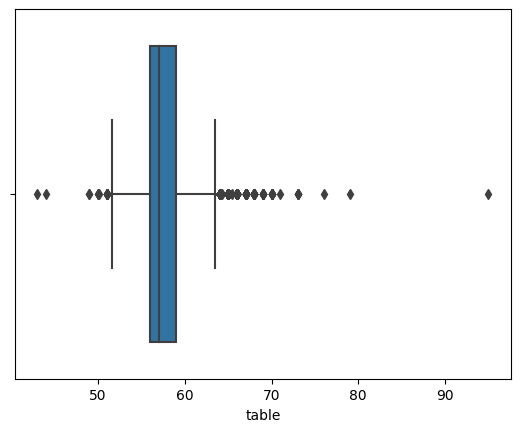

In [19]:
df_table = df["table"]
sns.boxplot(x = df_table)

In [20]:
Q1 = df_table.quantile(0.25) # quantile(), set ascending sıralandığı sırada senin içerisinden kartillerdeki gibi değer seçmeni sağlar.
Q3 = df_table.quantile(0.75)
IQR = (Q3-Q1)*1.5
print("Q1",Q1)
print("Q3",Q3)
print("IQR",IQR)

Q1 56.0
Q3 59.0
IQR 4.5


In [21]:
alt_sinir = Q1-IQR
ust_sinir = Q3+IQR
print("alt_sinir",alt_sinir)
print("ust_sinir",ust_sinir)

alt_sinir 51.5
ust_sinir 63.5


In [22]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [23]:
aykiriDegerler = ((df_table < alt_sinir) & (df_table > ust_sinir))
aykiriDegerler

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

Yukarıda True dönen değerler aykırı değerler olacak.

In [24]:
# True değerleri bulmaya çalışalım,kendi yolum
trueIndex = []
for i in aykiriDegerler.index:
  if(aykiriDegerler[i] == True):
    trueIndex.append(i)
trueIndex

[]

In [25]:
# pandas ile
aykiriDegerler[aykiriDegerler == True]

Series([], Name: table, dtype: bool)

Kısa bir programlama alıştırması yaptıktan sonra işimize devam edelim. Üç hücre önce alt sınır ve üst sınırdan yukarıda olan değerleri, yani aykırı değerleri, bulmuştuk. Şimdi Aykırı değerlere, dataframe'imiz üzerinden erişelim.

Erişme işlemi çok önemli çünkü hedefimizde bu değerleri silme, güncelleme gibi operasyonlar olabilir. Bu perasyonları yapabilmek için de önce ana veri setinden bu değerlere ulaşabilmemiz grekiyor.

In [26]:
df_table[aykiriDegerler] # hatırlarsan bu fancy yöntemi oluyordu. True değerleri bize dönecek.

Series([], Name: table, dtype: float64)

In [27]:
df_table[aykiriDegerler].index

Int64Index([], dtype='int64')

#### Aykırı Gözlem Problemini Çözme

Bir önceki başlıkta aykırı gözlemleri yakalamıştık. Bu başlıkta da onları nasıl çözdüğümüzü, çözerken nasıl düşündüğümüzü ele alacağız.

Genelde Aykırı Gözlemlere yapılan işlemler:
* Silme
* Aykırı Gözlemin Aykırı Değerlerini silip "ortalama" değer atama.
* Baskılama Yöntemi kullanma.

#### Silme 

In [28]:
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df_table = df["table"]
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [29]:
# aykırı değerlere erişelim , daha sonradan bakınca farkettim aykırı yerine gidip normal değerlere ulaşmışım 
aykiri_tf = ((df_table > alt_sinir) & (df_table < ust_sinir))
df_table[aykiri_tf]

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53334, dtype: float64

In [30]:
type(df_table)

pandas.core.series.Series

In [31]:
# silme işlemi için DataFrame'e çeviriyoruz.
df_table = pd.DataFrame(df_table)
type(df_table)

pandas.core.frame.DataFrame

In [32]:
# aykırı değerlere erişelim , tilda ile yapılanın
df_table[~aykiri_tf]

,table
2,65.0
91,69.0
145,64.0
219,64.0
227,67.0
...,...
53695,65.0
53697,65.0
53756,64.0
53757,64.0


In [33]:
df_table[(df_table["table"] < ust_sinir) & (df_table["table"] > alt_sinir)] # aykırı olMAyan

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [34]:
# temiz olanları bir yere atarak verileri silebiliriz.
# tilda işareti, çalıştırıalacak sorgunun dışındakileri döndürür
# farklılık olsun diye kullandık.
temiz_df = df_table[~((df_table["table"] < alt_sinir) | (df_table["table"] > ust_sinir))]
temiz_df

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


#### Ortalama ile Doldruma

In [35]:
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df_table = df["table"]
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [36]:
# seriler ile aykiri gozlem bulma
aykiri_gozlem = ((df_table < alt_sinir) | (df_table > ust_sinir))
aykiri_gozlem

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [37]:
df_table[aykiri_gozlem]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [38]:
# DataFrame ile aykiri gözlem bulma
df_table = pd.DataFrame(df_table)
df_table[((df_table["table"] < alt_sinir) | (df_table["table"] > ust_sinir))]

,table
2,65.0
91,69.0
145,64.0
219,64.0
227,67.0
...,...
53695,65.0
53697,65.0
53756,64.0
53757,64.0


- kendi yolum ile, aykırı değerlere ortalama atama
1. Önce aykırı olMayan değerler bulunur.
2. Daha sonra ortalamaları alınır.
3. Aykırı değerler bulunur.
4. Aykırı değerlere ortalama atanır.

In [39]:
# 1. Aykırı olmayan gözlemleri bul
not_outliers = df_table[(df["table"] > alt_sinir) & (df["table"] < ust_sinir)]
not_outliers

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [40]:
# 2. ortalamalarını bul
not_outliers.aggregate({"table":np.mean}) # or
atanacak_ortalama =not_outliers["table"].mean()

In [41]:
# 3. aykırı değerleri bul
outliers = df_table[(df_table.table > ust_sinir) | (df_table.table < alt_sinir)]
outliers

,table
2,65.0
91,69.0
145,64.0
219,64.0
227,67.0
...,...
53695,65.0
53697,65.0
53756,64.0
53757,64.0


In [42]:
df_table.iloc[[0,5,6,8]] # bu yol ile indexlere erişebilirsin, ya da bir alt hücre ile
df_table.iloc[list(outliers.index)]

,table
2,65.0
91,69.0
145,64.0
219,64.0
227,67.0
...,...
53695,65.0
53697,65.0
53756,64.0
53757,64.0


In [43]:
my_list = (df_table.table > ust_sinir) | (df_table.table < alt_sinir)
print(my_list)
df_table[my_list]

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool


,table
2,65.0
91,69.0
145,64.0
219,64.0
227,67.0
...,...
53695,65.0
53697,65.0
53756,64.0
53757,64.0


In [44]:
# 4. ortalmayı ata.
df_table[my_list] = atanacak_ortalama

In [45]:
# kontrol et.
df_table[(df_table.table > ust_sinir) | (df_table.table < alt_sinir)] # hiç gözlem dönmüyorsa okey.

,table


Şimdi de hocanın yoluyla deneyeceğiz

In [46]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])
df.isnull().values.any()
df_table = df["table"]
df_table.head()  # tipin pandas seri olduğuna dikkat et, biz dataframe ile çözdük

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [47]:
df_table.mean()

57.45718390804598

In [48]:
aykiri_degerler = ((df_table < alt_sinir) | (df_table > ust_sinir))
aykiri_degerler

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [49]:
df_table[aykiri_degerler] = df_table.mean() # uyarı verecek, çok takma

<ipython-input-49-0605d2ae024a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_degerler] = df_table.mean() # uyarı verecek, çok takma


In [50]:
# kontrol et 
df["table"][ ((df_table < alt_sinir) | (df_table > ust_sinir))] # 0 dönüyorsa doğrudur.

Series([], Name: table, dtype: float64)

Benim yötnemim ile hocanın yöntemi arasında küçük ama önemli bir fark var.

Ben önce aykırı değerleri çıkartıp, geriye kalan normal değerlerin ortalamsını aldım. Hoca ise tüm setteki ortalamaları aldı.

#### Baskılama Yöntemi

Bu yöntemde, üst sınırın üstünde kalan değerler üst sınıra; alt sınırın altında kalan değerler alt sınıra eşitlenir.

In [51]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])
df.isnull().values.any()
df_table = df["table"]
df_table.head()  # tipin pandas seri olduğuna dikkat et, biz dataframe ile çözdük

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [52]:
over_points = df_table > ust_sinir
under_points = df_table < alt_sinir

df_table[over_points] = ust_sinir
df_table[under_points] = alt_sinir

# kontrol
asas = ((df_table < alt_sinir) | (df_table > ust_sinir))
df_table[asas] # boş....

<ipython-input-52-6ba22bddaf32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[over_points] = ust_sinir
<ipython-input-52-6ba22bddaf32>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[under_points] = alt_sinir


Series([], Name: table, dtype: float64)

### Çok Değişkenli Aykırı Problem Çözme

Tek değişkenli aykırı değerlerde boxplot en sık kullanılanıdır (sektör bilgisi ile birlikte). Çok değişkenli de ise Local Outlier Factor en sık kullanılanıdır. 

Çok değişkenli aykırı problemi bir senaryo ile açıklayalım. MERNİS veri tabanına erişimimizin olduğunu düşünelim. Evlilik sayılarına baktığımızda 1,2,3 gibi değerler görebiliriz, bu normaldir. Fakat 18 yaşında birinin 3 kere evlenmesi normal bir durum değildir, olağan değildir. Evet 18 yaşındaki biri 2 kere boşanıp 3 kere evlenmiş olabilir fakat bu çok uç bir durumdur. Bu durumu gözlemler arasından çıkarmak mantıklıdır.

Yukarıdaki senaryo gibi, gözlemlerin aykırılık durumu birden fazla değişken ile değerlendirilmsine Çok Değişkenli Aykırı Problem denir.

Local Outlier Factor (LOF): Gözlemleri, bulundukları konumda yoğunluk bakımından skorlayarak buna göre aykırı değer olabilecek değerleri tanımamıza imkan sağlıyor. 

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularının yoğunluğundan anlamlı bir şekilde küçükse bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılır. Dolayısıyla burada bir komşuluk durumu söz konusu. Bir değerin çevresi yoğun değilse, o değer aykırı değer olarak düşünülüyor.

In [53]:
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df = df.select_dtypes(include = ["int64","float64"])
print("Na varmı? ", df.isnull().values.any())
df.head()

Na varmı?  False


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [54]:
from sklearn.neighbors import LocalOutlierFactor

In [55]:
# önce bir skorlama işlemi gerçekleştireceğiz.
clf = LocalOutlierFactor(n_neighbors=20,        # komşuluk sayısı 
                         contamination=0.1)     # yoğunluk derecesi
# bir instance oluşturduk. clf nesnesi, LOF'un biçimsel özelliklerini barındırıyor.

In [56]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [57]:
df_scores = clf.negative_outlier_factor_

In [58]:
df_scores[0:10] # her bir gözlemin yoğunluk skoru

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [59]:
np.sort(df_scores[0:10])

array([-1.62278873, -1.59732899, -1.58352526, -1.33002541, -1.30712521,
       -1.28428162, -1.28422952, -1.28408436, -1.27351342, -1.26458706])

In [60]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

Burada bir eşik değer belirlenecek, biz şuan random seçip atayacağız ama gerçek hayatta tabiki bu böyle olmuyor. Belirli iş çalışmaları ve analizler sonucunda atanıyor.

In [61]:
esik_deger = np.sort(df_scores)[13]  

In [62]:
yeni_df = df[df_scores > esik_deger]
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


Bu aslında silme yöntemi oluyor, eşik değerin altı/üsünde kalan değerleri çıkarıyoruz. Tek değişkenli aykırı gözlemden tek farkı yoğunluk olması.

### Baskılama Yöntemi

Tek değişkenli değerlerde olduğu gibi, burada da değerleri alttan ve üstten baskılayabliyoruz.

Çoğu çok değişkenli use-case'lerde baskılama ve silme yöntemleri en mantıklı yöntemler olabiliyor. Ortalama çok tercih edilmeyebiliyor.

In [63]:
df[ df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [64]:
baski_degeri = df[ df_scores == esik_deger]

In [65]:
aykiri_degerler = df[df_scores < esik_deger]


Şimdi biz burada aykırı değerler yerine eşik değer olarak belirlediğimiz baski_degeri'ni atayacağız. Bu atamaişlemlerinde index problemleri yaşayabiliyoruz. Indexler karışabiliyor. Bunun için:
1. Aykırılar dataframe'ini indexsiz bir array'e çevireceğiz.
2. baski_degeri'ni de arrayleştirip atama işlemini gerçekleştireceğiz.
3. aykiri_degerini dataframe'e çevir
4. Ana dataframe'e ata

In [66]:
res = aykiri_degerler.to_records(index = False)
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [67]:
res[:] = baski_degeri.to_records(index = False)
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [68]:
df[df_scores < esik_deger] # gördüğün gibi bu değerler değişmemiş, şimdi değiştireceğz.

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [69]:
# aşşağıdaki işlemi iyice anla
df[df_scores < esik_deger] = pd.DataFrame(res, index = df[df_scores < esik_deger].index )

In [70]:
df[df_scores < esik_deger] 

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
49189,0.45,68.6,57.0,756,4.73,4.5,3.19


## Eksik Gözlem Analizi (Missing Data Analysis)

### Konu Anlatımı

Adı üstünde, incelenen veri setinde eksik gözlem bulunması durumudur. Bu Sorunun çözümü için: eksik değerin bulunduğu gözlemi silme ve ya veriyi doldurma işlemleri yapılabilir. Her ikisininde artı ve eksi (problem çıkartan) durumları vardır. Detaylıca inceleyeceğiz.

~ Eksik değerlere sahip gözlemlerin veri setinden direk çıkarılması ve rassallığının incelenmemesi yapılacak istatistiksel çıkarımların, modelleme çalışmalarının güvenirliliğini düşürecektir. (Reha Alpar, 2011)
<br> <br>
~ Eksik gözlemlerin veri setinden direk çıkarılabilmesi için veri setindeki eksikliğin bazı durumlarda tamamen raslantısal olarak oluşmuş olması gerekmektedir. Eğer eksiklikler değişkenler ile ilişkili olarak ortaya çıkan yapısal problemler ile meydana gelmiş ise bu durumda yapılacak silme işlemleri ciddi yanlılıklara sebep olabilecektir. (Çok Değişkenli İstatistikler, Tabachnick & Fidell 1996)
<br> <br>
Bu abilerimizin dediklerinden çıkarılacak sonuç: eğer veri setindeki eksiklikler tamamen rassal bir şekilde oluşmuyor ise silme işlemi yapmak veri setinde yanlılığa (bias) sebep olacaktır. Önceden de bildiğin üzere yanlılık underfittinge sebep oluyor.
<br> <br>
**Peki bir veri setinde eksiklik var ise nasıl yaklaşmamız gerekir? Adım adım inceleyelin:**
1. Veri setindeki eksikliğin yapısal bir eksiklik olup olmadığı incelenip bilinmesi gerekmektedir! (Böylelikle silme ya da doldurma işlemine yöneliriz.)
  * Yapısal eksiklikten kastımız ne? Şöyle düşünelim, elimizde bankanın müşterilerinin kredi kartı sahip olup olmaması ve kredi kartı harcamaları olan bir veri tablosu olsun olsun. 

|Kredi Kartı Sahiplik Durumu|Kredi Kartı Harcaması|
|---|---|
|1|123|
|0|NA|
|1|0|

  * Bu tabloya baktığımızda, kredi kartı olmayan müşterilerin kart harcaması durumları NA olarak verilmiş. Bu bir eksik gözlem. Fakat burada eksiklik, kredi kartı harcaması olmadğı için var, müşteri zaten kullanamıyor, dolayısıyla 0 olması gerekiyor. Bu bir yapısal eksikliktir. Verinin iletiminden kaynaklanan ya da random oluşan bir hatadan ya da müşterinin formu eksik doldurmasından kaynaklanan bir eksik gözlem değildir. Kredi kartı olmayanların harcaması olamayacağı için eksik veri girilmiştir! İşte bu verileri silmek yerine 0 ile doldurmamız daha doğrudur. **Bu arada,** bu eksik verileri ortalama ile doldurmakta hatalı oalcaktır, veri setinde yanlılığa sebep olacağı için güvenilmez bir model kurulacaktır. Bu yüzden eksikliğin durumunu inceleyip doldurma kararı verdiken sonra, ne ile dolduracağımızında kararını vermeliyiz.

2. NA her zaman bir eksiklik anlamına gelmez!

|Kredi Kartı Sahiplik Durumu|Kredi Kartı Harcaması|
|---|---|
|1|123|
|0|NA|
|1|NA|

 * Yukarıdaki tabloyu incelediğimizde en alttak kart sahibinin kredi kartı harcaması durumu eksik gözüküyor. Veri eksik olmuş olabilir ama bir durum daha var, verinin eksik olmaması. Burada kart sahibi hiç alışveriş yapmamış olabilir ya da kart sahibinin harcamaları ölçülmemiş olabilir yani bir ölçme işlemi yapılmamış olabilir. İşte bu durum bize verinin her zaman eksik değil, bazen de 0 olduğu ve ya ölçümün yapılmadığı anlamına gelir.
<br>

3. Bilgi kaybı! 100 değişkenli/boyutlu/feature'lı bir veri setimiz olduğunu düşünelim, gözlemlerden birinin 99 özelliği dolu 1'i boş olsun. Bu durumda veriyi silmekte çok doğru olmaz çünkü 1 değerden dolayı 99 değer kaybedeceğiz! Aşşağıdaki tabloya baktığında sende farkeeceksin ki 1 özellik boş diye 99'unu kaybedeceğiz. Bunun yerine o değişkeni belirlediğimiz bir değer ile doldurmak daha mantıklıdır.

|Müşteri|Feature 1|.|.|.|Feature 100|
|--|--|--|--|--|--|
|Müşteri 1|.|.|.|.|NA|
|Müşteri 2|.|.|.|99|75|
|Müşteri 3|.|.|.|99|75|
|Müşteri 4|.|.|.|99|75|
|Müşteri n|.|.|.|.|.|

Eksik veri ile karşılaşıldığında atılması gereken adımları bahsetmiş olduk. Peki Eksik Veri Türleri nedir? Bu önemli bir soru çünkü eksik veri sorunun çözümünü (silme ve ya doldurma) buna göre de belirliyoruz. Atama yapılacksa nasıl yapılacak...

Eksik Veri Türleri:
1. Tümüyle Raslantısal Kayıp: Diğer değişkenlerden ya da yapısal problemlerden kaynaklanmayan tamamen rastgele oluşan eksiklikler. Çok sevilir kendisi, direk silme işlemi için birebirdir.
2. Raslantısal Kayıp: Diğer değişkenlere bağlı olarak oluşabilen eksiklik türü.
3. Raslantısal Olmayan Kayıp: Göz ardı edilemeyecek olan ve yapısal problemler ile ortaya çıkan eksiklik türü. Bu problemler hem diğer değişkenlere bağlı olarak ortaya da çıkmış olabilir hem de mantıksal, gürültüsel sebeplerlede ortaya çıkmış olabilir. Bu en sevmediğimiz kayıp türü, ciddi uğraştırır.

<br><br>
Verilerin nasıl eksik olduğunu da böylelikle incelemiş olduk. Bir veri setinde eksik veri üzerinde silme ya da doldurma işlemi yapabilriz demiştik. Bunu yapabilmek içinde önce rassallık testi yapmamız gerekir. Yukarıdaki Eksik Veri Türleri'nde de gördüğümüz gibi veri eksikliği her zaman rassal olmayabiliyor. Peki bu eksik verilerin rassal olup olmadığını nasıl anlayacağız? İşte bunun için test yöntemleri var. Bunlar:
* Görsel Teknikler
* Bağımsız İki Örneklem T Testi
* Korelasyon Testi
* Little'nin MCR Testi

Pratikte uygulanan genelde Görsel Teknikler ve Little'nin Mcar Testi oluyor. Biz uygulama kapsamında Görsel Teknikler ile eksik verilerin pattern'ini inceleyeceğiz.

~ The idea of imputation is both seductive and dangerous. (R.J.A Little & D.B. Rubin) (Atama fikri hem çekici hem de tehlikelidir.

Eğer eksik verileri doldruma kararı aldıysak, doğru şekilde doldurulmaması inanılmaz şekilde bizi ilk durumdan daha kötü hale getirebilir. Bu yüzden eksik verilrin doğru şekilde doldurulması ya da silinicekse silinmesi önemlidir.

<br><br>
Ekisk Veri Problemlerinin Giderilme Yöntemleri:
1. Silme Yöntemi:
  * Gözlem ya da değişken silme yöntemi
  * Liste Bazında Silme Yöntemi (Listwise Method)
  * Çiftler Bazında Silme Yöntemi (Pairwise Method)

Not: Genelde gözlemin %70 kadarı boş ise (gözlemin değişkenlerinin %70'i) sileceğiz. Oranı biz belrleyebiliriz. Zaten gözlemin çoğu değişkeni boşsa, işlem yapılıırken diğer durumlarda yanlılığa sebep olabileceği için silmek daha mantıklı.

2. Değer Atama Yöntemi:
  * Ortanca, ortalama, medyan
  * En benzer birime atama (hot deck)
  * Dış Kaynaklı atama

3. Tahmine Dayalı Yöntemler:
  * Makine Öğrenmesi
  * EM
  * Çoklu Atama Yöntemi

### Eksik Veri Hızlı Çözüm

In [71]:
df = pd.DataFrame({"V1":np.array([1,2,np.NaN,4,5]),
                   "V2":np.array([6,np.NaN,8,9,10]),
                   "V3":np.array([11,12,13,np.NaN,np.NaN])
})
df

,V1,V2,V3
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,NaN


In [72]:
# değişkenlerdeki eksik veri sayısını bul
df.isnull().sum()

V1    1
V2    1
V3    2
dtype: int64

In [73]:
# değişkenlerde eksik olmayan veri sayısını bul
df.notnull().sum()

V1    4
V2    4
V3    3
dtype: int64

In [74]:
# gözlem ile değişken sayısı da aklında bir yerde bulunsun
df.shape

(5, 3)

In [75]:
# veri setindeki toplam na değeri sayısını bul
(df
 .isnull() # boş mu değil mi sorgusu
 .sum()    # sütunlarda ne kadar boş var
 .sum())   # toplamda ne kadar boş var

4

In [76]:
df.isnull()

,V1,V2,V3
0,False,False,False
1,False,True,False
2,True,False,False
3,False,False,True
4,False,False,True


In [77]:
# eksik değer içeren gözlemleri bul
df[df.isnull().any(axis = 1)] # any hiç var mı anlamında kullanılıyor, bu yüzden 1 tane  bile na olan varsa getirecek

,V1,V2,V3
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,NaN


In [78]:
# eksik değer içermeyen gözlemleri getir
df[df.notnull().all(axis = 1)] # all hepsi anlamında kullanılıyor, satırdaki tüm değişkenlerde notnull sorgusunu sağlayan gözlemleri getirecek
# ya da:
df[~df.isnull().any(axis = 1)]

,V1,V2,V3
0,1.0,6.0,11.0


In [79]:
# kendi tarzınla eksik olmayanları bul ;)
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
0,1.0,6.0,11.0


In [80]:
# kendi tarzınla eksik olanları bul
df[df["V1"].isnull() | df["V2"].isnull() | df["V3"].isnull()]

,V1,V2,V3
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,NaN


In [81]:
# eksik değerlerin direkt silinmesi, inplace true yapmadığın sürece geçici olaacak
df.dropna()

,V1,V2,V3
0,1.0,6.0,11.0


In [82]:
# basit değer atama ile yapma, mesela ortalama atıyalım
df.V1[df["V1"].isnull()] = df.V1.mean()
df["V1"]

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: V1, dtype: float64

In [83]:
# fillna() fonksiyonunu kullanarak değer atayalım
df.V2.fillna(df.V2.mean(),inplace=True)
df.V2

0     6.00
1     8.25
2     8.00
3     9.00
4    10.00
Name: V2, dtype: float64

In [84]:
# 0 atayarak dolduralım birde.
df.V3.fillna(0,inplace=True)
df

,V1,V2,V3
0,1.0,6.00,11.0
1,2.0,8.25,12.0
2,3.0,8.00,13.0
3,4.0,9.00,0.0
4,5.0,10.00,0.0


3 tane değişkenli bir veri setinde Eksik gözlemleri doldurmak çokta zor olmaz. Peki 100 değişkenin olduğu bir veri setinde (Eksik gözlemleri ortalama ile doldurmaya karar verdik diyelim) bu atama işlemini otomatize hale getiremez miyiz? Tabiki yapabiliriz, lambda ve apply fonksiyonları ile. Apply() fonksiyonu sütunlar bazında iş yapar! Bu bizi inanılmaz rahatlatacak.

In [85]:
df = pd.DataFrame({"V1":np.array([1,2,np.NaN,4,5]),
                   "V2":np.array([6,np.NaN,8,9,10]),
                   "V3":np.array([11,12,13,np.NaN,np.NaN])
})
df

,V1,V2,V3
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,NaN


In [86]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0) # axis 0 diyoruz, çünkü ortalama alacağı zaman o değişkenin değerlerine erişmesi içi satır satr ilerleyip değer alması gerekiyor.

,V1,V2,V3
0,1.0,6.00,11.0
1,2.0,8.25,12.0
2,3.0,8.00,13.0
3,4.0,9.00,12.0
4,5.0,10.00,12.0


### Eksik Veri Yapısının Görselleştirilmesi

Veri Setinde'ki eksikliğin incelenmesi için Görselleştirme Teknikleri'ni kullanacağız. Böylelikle eksikliğin türünü (rassal mı yapısal mı) belirleyebileceğiz.

In [87]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
import missingno as msn

<Axes: >

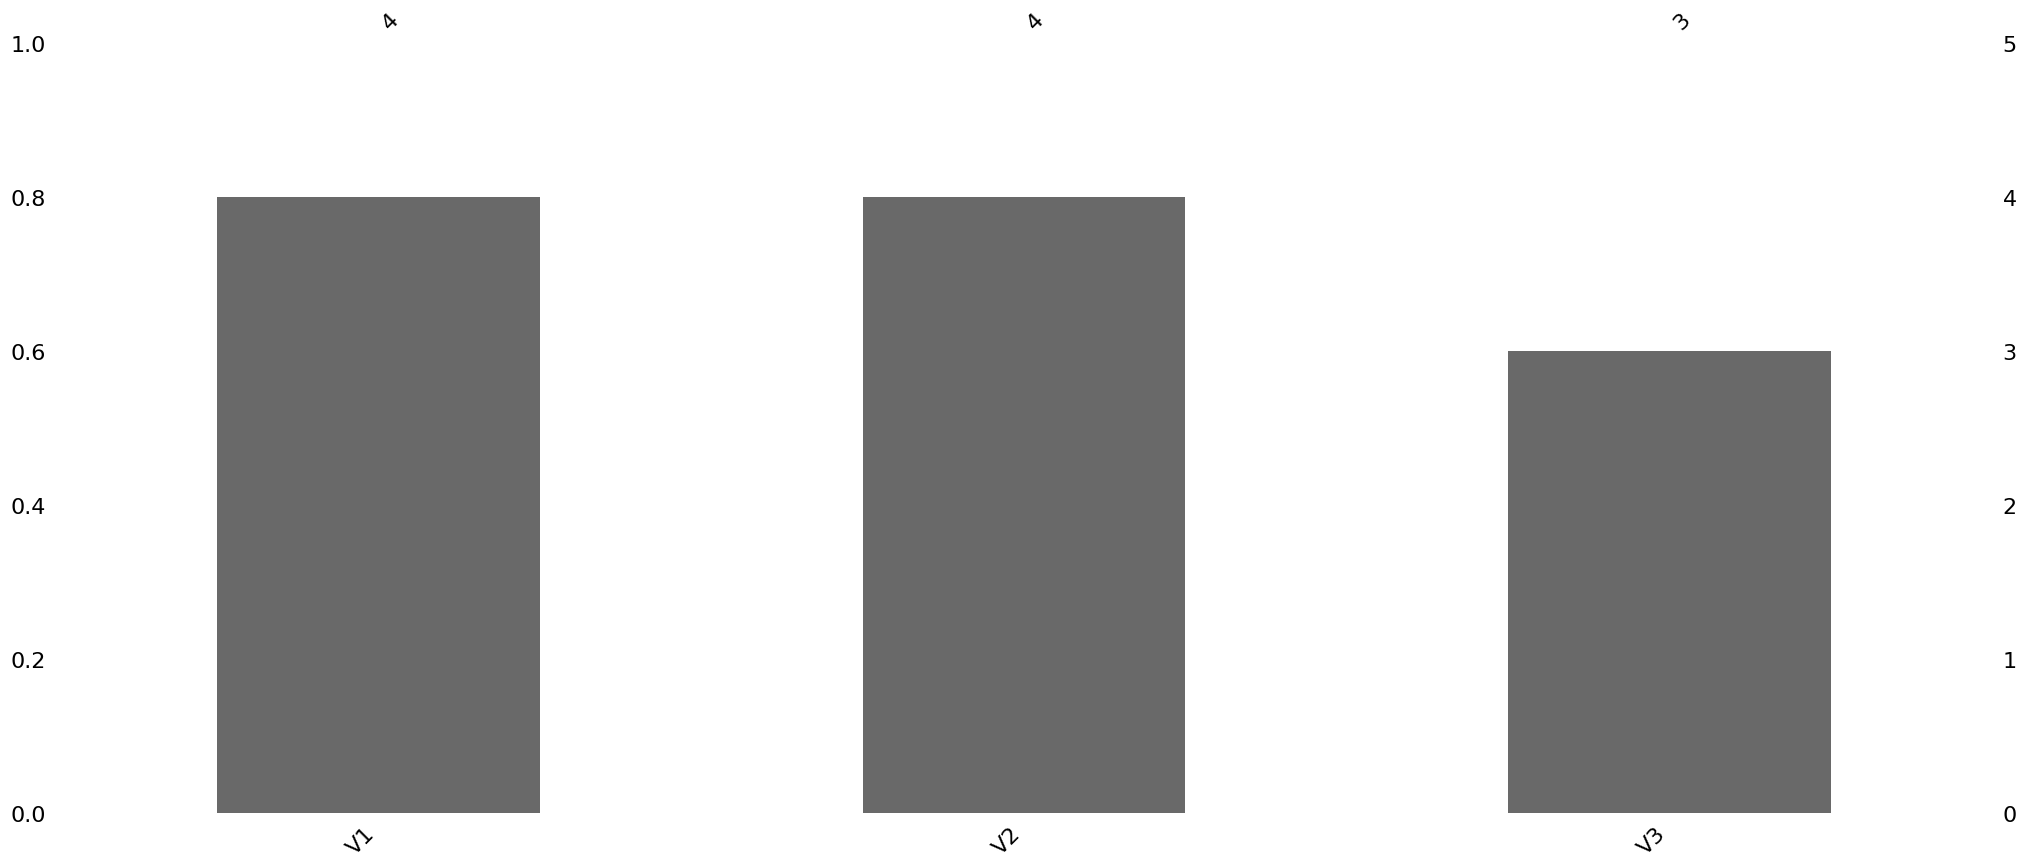

In [89]:
msn.bar(df)

Sağdaki eksen sütundaki veri sayısını veriyor. <br>
Soldaki eksen sütunun doluluk oranını veriyor. Tam Değer/Eksik Değer <br>
Sütunların üstündeki sayılar ise, o sütunun içerdiği Tam Değerlerin sayısını gösteriyor. <br>
Elle yaptığımız işlemleri, kendisi görselleştirip sunuyor.

<Axes: >

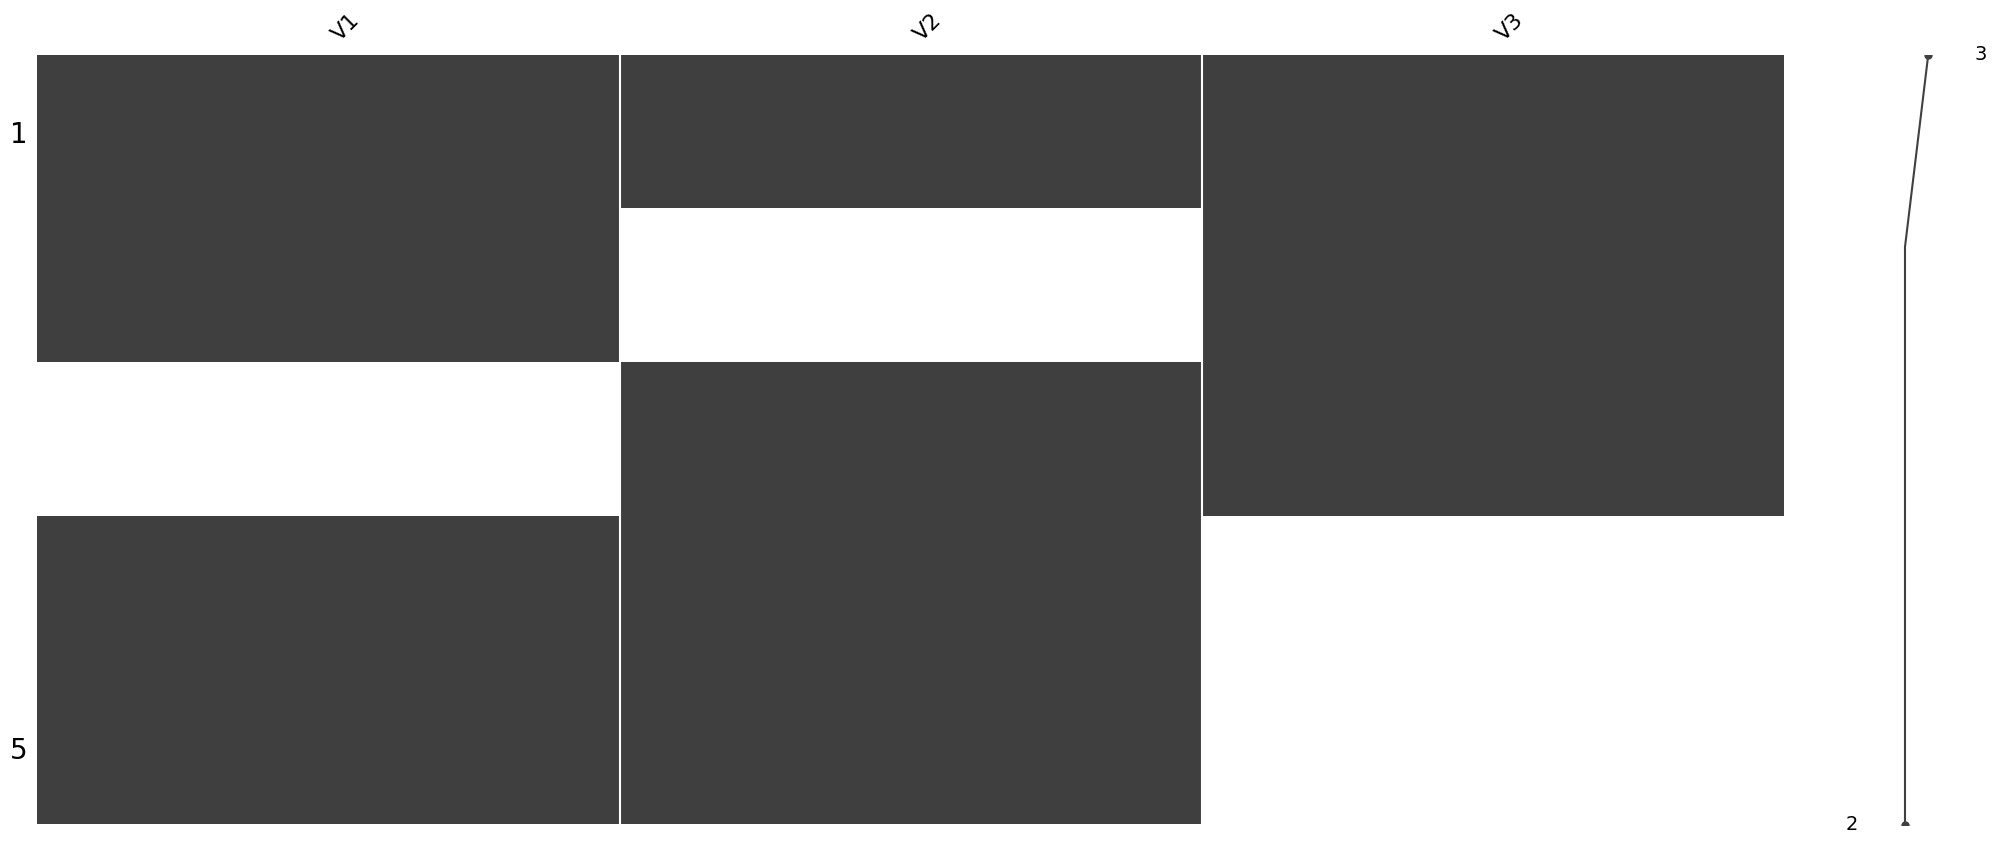

In [90]:
msn.matrix(df)

Yapısal bozukluları görüp yakalama imkanı veren bir görsel. <br>
Siyah alanlar, içi dolu değişkenler; boş alanlar ise NaN değişkenler.<br>
Veri setindeki NaN durumlarına bakış atmak için harika bir yöntem. <br>
Sağdaki eksendeki değerler, dolu değişken sayısı (3 ve 2) <br>
Şimdu bu grafikleri gerçek bir veri seti üzerinde inceleyelim.

In [91]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


<Axes: >

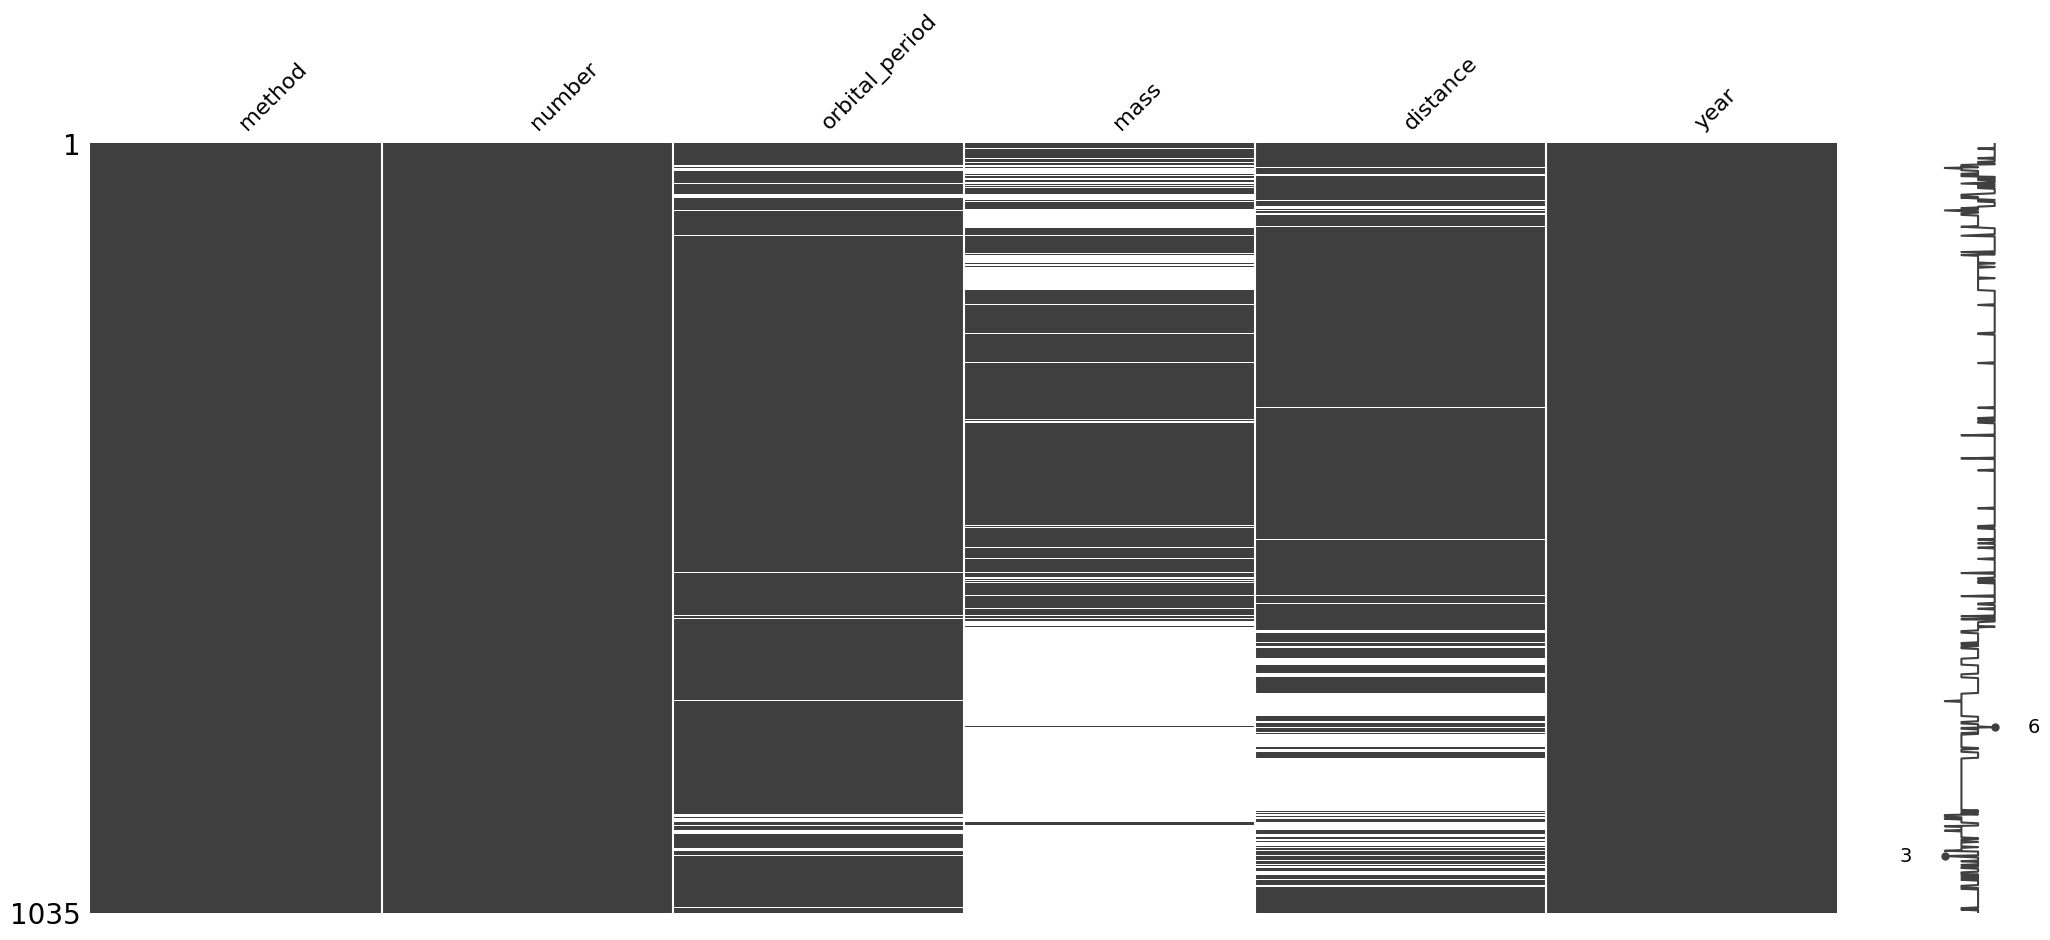

In [92]:
msn.matrix(df)

Grafiği incelediimizde, "orbital_period" değişkeninin NaN olduğu yerlerde "mass" değişkenininde NaN olduğu, fakat tam tersi durumda ("mass" NaN iken "orbital_period" NaN olmadığı) gözlemlenmektedir. Çok açık bir şekilde "mass" değişkeninin "orbita_period" değişkenine bağlı olduğu söylenebilir. Bu yüzden "mass" değişkenindeki her NaN değer rassal bir eksiklik değil, "orbital_period" verisi olmadığı için eksik olan bir YAPISAL EKSİKLİK türüdür. Bu yüzden bu verileri handle ederken hemen "silelim" diyemiyoruz, çünkü rassal bir şekilde oluşmak yerine yapısal bir sorundan kaynaklanıyor.

"distance" değişenine bakıldığında da çok belli bir ilişki gözlemlenemiyor. _İşte iş bigisi (domain knowladge) burada inanılmaz iş görüyor!_ Bu veri setini inceleyen bir NASA çalışanı, feature'larda nelerin bağımlılık oluşturup oluştuamayacağını bildiği için, bize göre çok daha kolay eksikliklerin türlerini inceleyebilir. Seninde illa bilmen gerekmiyor tabii ki. Dikkatli incelersen sende  bu eksiklikleri farkedebilirsin. Senin en büyük artın 135 IQ'un olması :)

<Axes: >

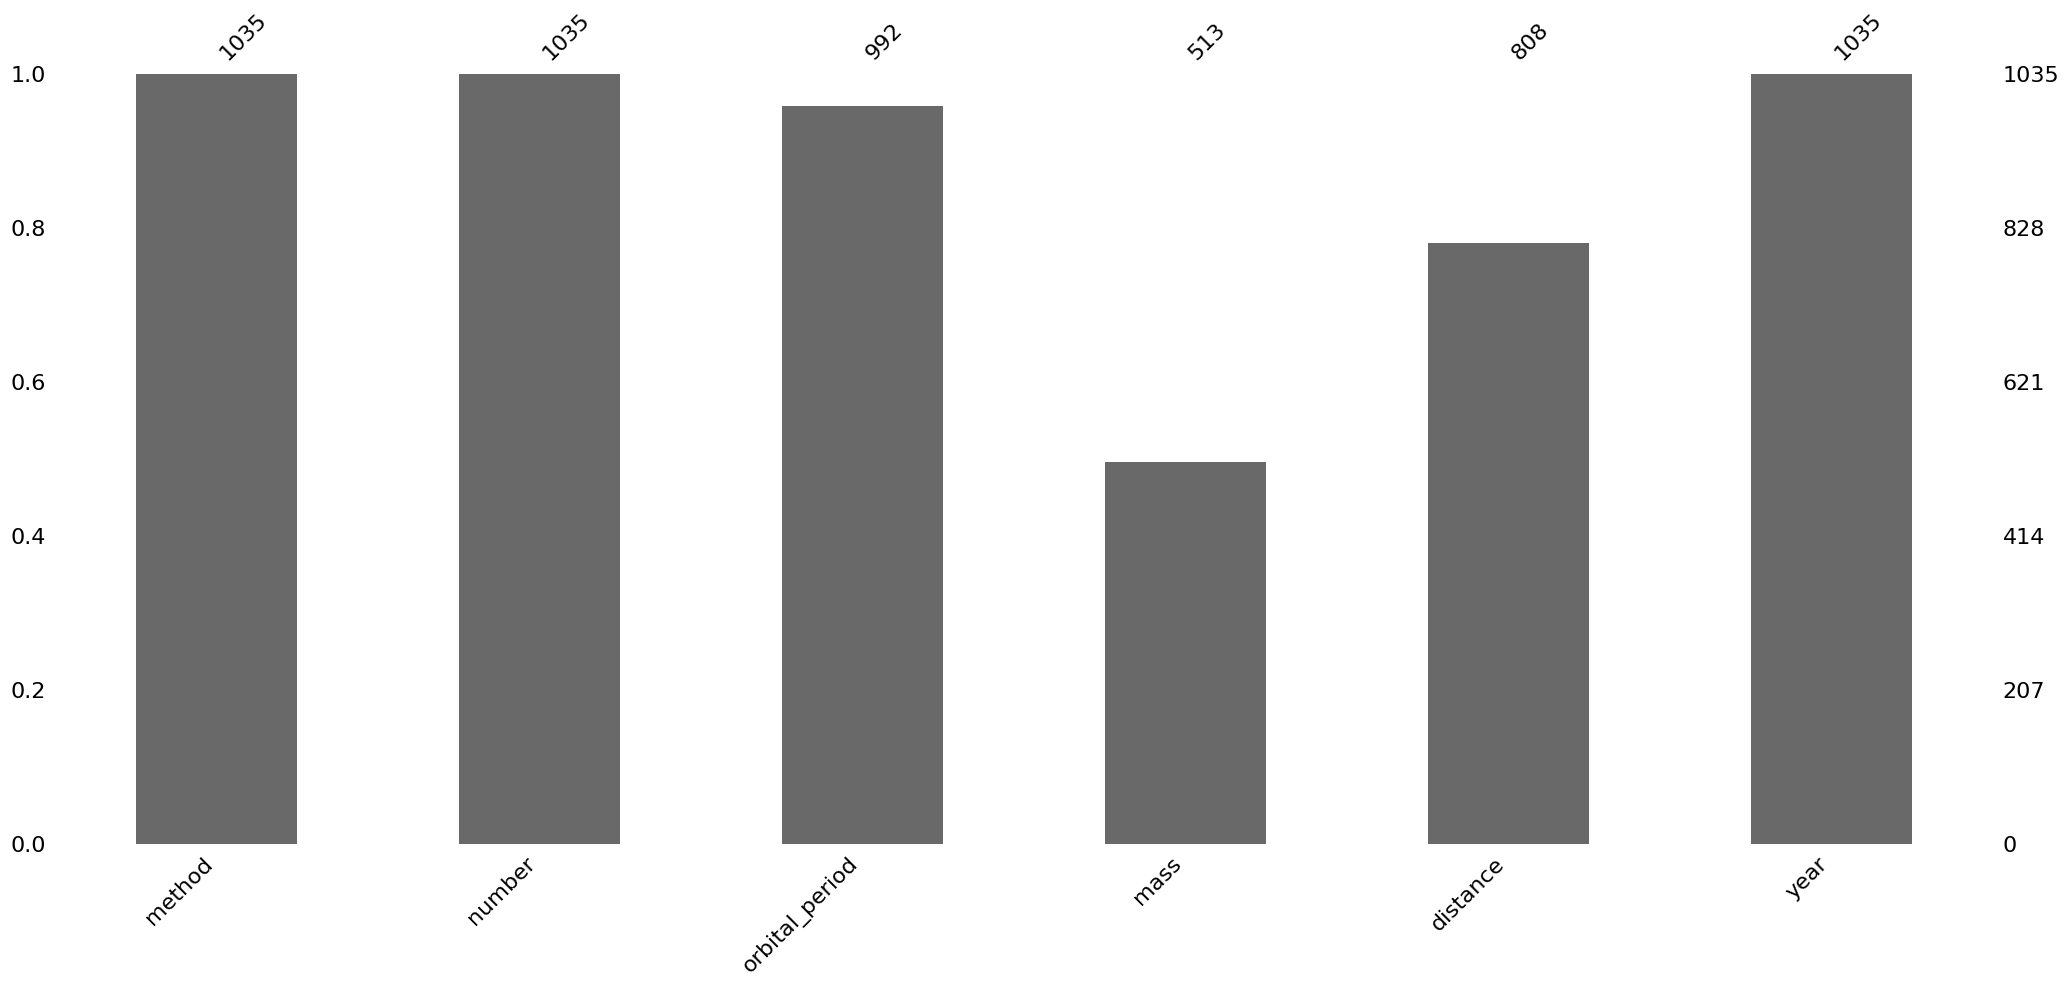

In [93]:
msn.bar(df)

Bu grafiğide, sütunlara göre eksik veri sayısı ile yorumlayıp incelemek için kullanabilirsin.

<Axes: >

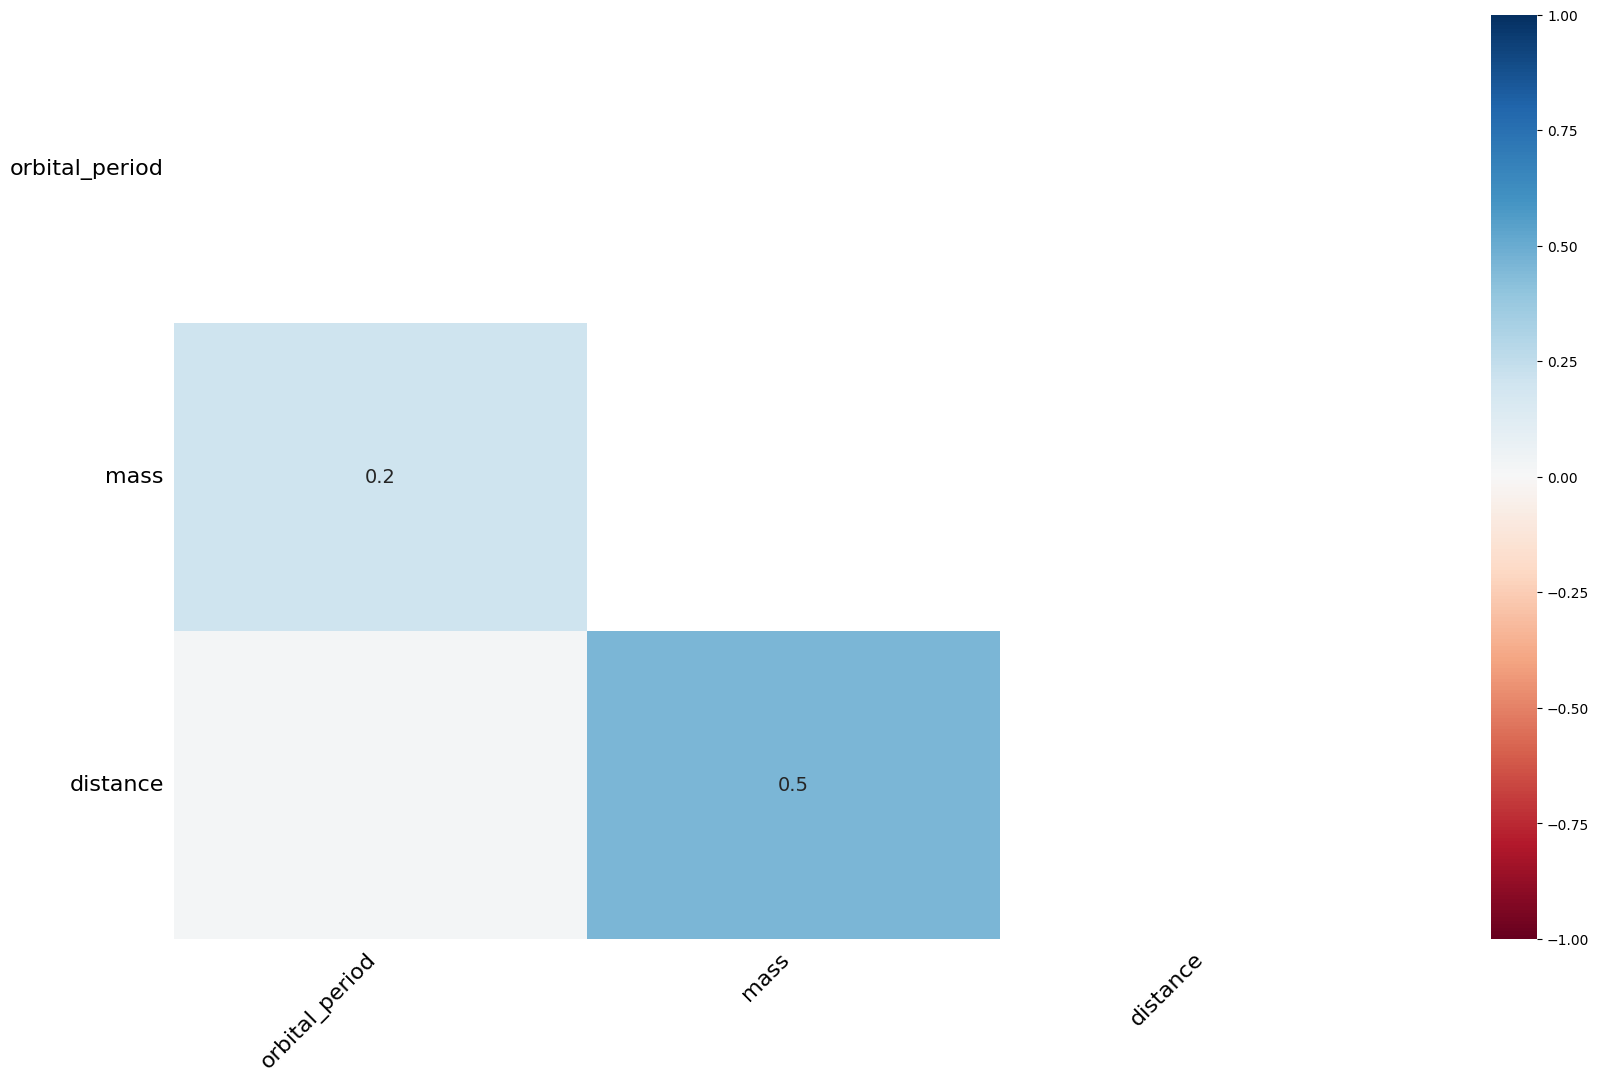

In [94]:
msn.heatmap(df)

HeatMap bize Nullity Correlation (Boşluk Korelasyonu) grafiği verir. Bu değerler -1 ile +1 arasında değer alır. <br>
Grafiği incelersek, kendimiz zaten "orbital_preiod" ile "mass" değişkenleri arasında bir ilişki bulmuştuk. Fakat biz "mass" ile distance değişkenleri arasında bir ilişki (NaN olma açısından) yakalayamamıştık. Bu grafik bize 2 değişken arasında Yokluk Korelasonu değeri vererek ilişki kurma konusunda oldukça yardımcı oluyor.
<br> <br>
Sonuç olarak bu veri setindeki değişkenler "rassal" olarak eksik değerler içermiyor, "yapısal olarak" eksik değerler içeriyor. Bu yüzden bu veri setinde silme yerine doldurma işlemi yapmalıyız.

### Silme ile Doldurma

Burada tespit olduğumuz eksik verileri, silme yöntemleri ile nasıl giderebileceğimizi göreceğiz. Gerçekçi olması için, büyük bir veri seti üzerinde yapacağız.

In [95]:
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


İlk yapacağımız işlem: En az 1 NaN değere sahip olan gözlemlerin silinmesi işlemi.

In [96]:
df.dropna() # kaydetmek için inplace True argümanını girmelisin.

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


İkinci olarak: Tüm değerleri NaN olan gözlemlerin silinmesi.

In [97]:
df.dropna(how = "all")

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


Şimdi de gözlem bazında değilde değişken bazında silmeye bakalım. Bunun için axis argümanına 1 değeri vermemiz gerekiyor.

In [98]:
df.dropna(axis = 1) # en az 1 NaN değerine sahip olan değişkenleri sil. Tabii direk 3 - 4 kolon silinecek, veri setinde baya nan değişken var.

,method,number,year
0,Radial Velocity,1,2006
1,Radial Velocity,1,2008
2,Radial Velocity,1,2011
3,Radial Velocity,1,2007
4,Radial Velocity,1,2009
...,...,...,...
1030,Transit,1,2006
1031,Transit,1,2007
1032,Transit,1,2007
1033,Transit,1,2008


In [99]:
# tüm değerleri nan olan değişkenleri sil. Öyle bir kolon olmadığı için 6 kolonun 6 sıda duracak.
df.dropna(how="all",axis = 1)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


### Basit Değer Atama Yöntemleri

Önceki başlıkta eksik verileri silmiştik. Şimdi ise eksik verileri doldurmayı göreceğiz.

#### Sayısal Değişkenlerde Atama

Daha önceden de gördüğümüz gibi: 0, ortalama, ortanca değer ya da şirketin belirlediği kendi değeri boşluklara atayabilirsin.

In [100]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [101]:
# 0 ata, ama inplace true yapma
df["orbital_period"].fillna(0) 

0       269.300000
1       874.774000
2       763.000000
3       326.030000
4       516.220000
           ...    
1030      3.941507
1031      2.615864
1032      3.191524
1033      4.125083
1034      4.187757
Name: orbital_period, Length: 1035, dtype: float64

In [102]:
# ortalama ile doldur
df.orbital_period[ df["orbital_period"].isnull() ] = df.orbital_period.mean()  # ya da
df.orbital_period.fillna(df.orbital_period.mean())

<ipython-input-102-abd1af3cb288>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.orbital_period[ df["orbital_period"].isnull() ] = df.orbital_period.mean()  # ya da


0       269.300000
1       874.774000
2       763.000000
3       326.030000
4       516.220000
           ...    
1030      3.941507
1031      2.615864
1032      3.191524
1033      4.125083
1034      4.187757
Name: orbital_period, Length: 1035, dtype: float64

In [103]:
# tüm değişkenler üzerinde, boş olanlara ortalama ata
df = df.select_dtypes(include = ["int64","float64"])   # ortalama gibi işlemleri sayısal değişkenlere yapabileceğimiz için....
df.apply(lambda x: x.fillna(x.mean(),axis = 0))

,number,orbital_period,mass,distance,year
0,1,269.300000,7.100000,77.40,2006
1,1,874.774000,2.210000,56.95,2008
2,1,763.000000,2.600000,19.84,2011
3,1,326.030000,19.400000,110.62,2007
4,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,2.638161,172.00,2006
1031,1,2.615864,2.638161,148.00,2007
1032,1,3.191524,2.638161,174.00,2007
1033,1,4.125083,2.638161,293.00,2008


In [104]:
df.isnull().sum()

number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [105]:
# tüm değişkenleri doldurmak için ikinci yol
df.fillna(df.mean()) # yukarıdakinin aynısı

,number,orbital_period,mass,distance,year
0,1,269.300000,7.100000,77.40,2006
1,1,874.774000,2.210000,56.95,2008
2,1,763.000000,2.600000,19.84,2011
3,1,326.030000,19.400000,110.62,2007
4,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,2.638161,172.00,2006
1031,1,2.615864,2.638161,148.00,2007
1032,1,3.191524,2.638161,174.00,2007
1033,1,4.125083,2.638161,293.00,2008


In [106]:
df.isnull().sum()

number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [107]:
# Her zaman ortalama atamak mantıklı olmaz. Eğer feature'ın dağılımı çarpık ise ortalama daha da bozar. Bu yüzden seçtiğimiz değişkenlere ortalama değişken atamak isteyebiliriz. Bunun için:
df.fillna(df.mean()[1:3]) # seili değişkenlere atayackken diğerlerine karışmayacak.

,number,orbital_period,mass,distance,year
0,1,269.300000,7.100000,77.40,2006
1,1,874.774000,2.210000,56.95,2008
2,1,763.000000,2.600000,19.84,2011
3,1,326.030000,19.400000,110.62,2007
4,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,2.638161,172.00,2006
1031,1,2.615864,2.638161,148.00,2007
1032,1,3.191524,2.638161,174.00,2007
1033,1,4.125083,2.638161,293.00,2008


In [108]:
df["mass"].fillna(df["mass"].median()) # gibi işlemler uygulayabilirin

0        7.10
1        2.21
2        2.60
3       19.40
4       10.50
        ...  
1030     1.26
1031     1.26
1032     1.26
1033     1.26
1034     1.26
Name: mass, Length: 1035, dtype: float64

In [109]:
# tüm değişkenleri doldurmak için üçüncü yol: 

In [110]:
df.where(pd.notna(df), df.mean(), axis = "columns")

,number,orbital_period,mass,distance,year
0,1,269.300000,7.100000,77.40,2006
1,1,874.774000,2.210000,56.95,2008
2,1,763.000000,2.600000,19.84,2011
3,1,326.030000,19.400000,110.62,2007
4,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,2.638161,172.00,2006
1031,1,2.615864,2.638161,148.00,2007
1032,1,3.191524,2.638161,174.00,2007
1033,1,4.125083,2.638161,293.00,2008


#### Kategorik Değişken Kırılımında Değişken Atama (Sayısal Değişkenler Konusu Başlığı Altında)

Orta-ileri seviye ihtiyaçlardan birisi. Bu yüzden bunu bilmek sana baya artı katar.

Bir firmadaki yöneticiye, yeni maaşı belirleneceği zaman ortalama üzerindnen işlem yapılmaz ya da bir stajyere. Bunun için bir kategorik kırılım olması gerekir. Yönetim tarafının maaş ortalaması ile çalışan tarafın maaş ortalaması.
Ya da pazarlama departmanına girecek birinin kendi departmanınn ortalamsına göre maaş alması. Hatta ileride buna maaş, uzmanlık, deneyim seviyesi gibi şeyler ekleyip bir maaş çıkartılmalıdır.

In [111]:
df = pd.DataFrame({
    "maas": np.array([1,3,6,np.NaN,7,1,np.NaN,9,15]),
    "V2": np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3]),
    "V3": np.array([np.NaN,12,5,6,14,7,np.NaN,2,31]),
    "departman": np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])
})
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [112]:
df["maas"].transform(lambda x : x+2)

0     3.0
1     5.0
2     8.0
3     NaN
4     9.0
5     3.0
6     NaN
7    11.0
8    17.0
Name: maas, dtype: float64

In [113]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

#### Kategorik Değişkenler için Değer Atama

Kategorik değişkenlerdeki atama yöntemlerinden en sık yapılanı, mod ile en çok terkar eden değişkeni bulup atamaktır.
<br><br>

In [114]:
df = pd.DataFrame({
    "maas": np.array([1,3,6,np.NaN,7,1,np.NaN,9,15]),
    "V2": np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3]),
    "V3": np.array([np.NaN,12,5,6,14,7,np.NaN,2,31]),
    "departman": np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"],dtype=object)
})
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [115]:
df.departman.fillna(df.departman.mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

Bazen de mod yerine, o gözlemin na değerinin bir önceki gözlemdeki ya da bir sonraki gözlemdeki değerini atamak isteyebiliriz.

In [116]:
df["departman"][df.departman.isnull()].index # indexi buldum

a =df["departman"][df.departman.isnull()].index
a[0] # kullanılabilir bir halde olan index değeri

df.iloc[df["departman"][df.departman.isnull()].index,:] # veri setinin içerinden eriştim

df.iloc[df["departman"][df.departman.isnull()].index,3] # sütunun kendisine eriştim

df.iloc[df["departman"][df.departman.isnull()].index,3] = df.iloc[a[0]+1,3] # bir sonraki değer
df.iloc[df["departman"][df.departman.isnull()].index,3] = df.iloc[a[0]-1,3] # bir önceki değer

In [117]:
# daha kolayı hazır fonksiyon var
df["departman"].fillna(method = "bfill") # sonraki değer
df["departman"].fillna(method = "ffill") # öcneki değer

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

## Tahmine Dayalı Değer Atama - KNN & Random Forest & EM

In [118]:
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["int64","float64"])
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [119]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [120]:
!pip install ycimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### KNN ile Değer Atama

In [121]:
from sklearn.impute import KNNImputer

In [122]:
var_names = list(df)
n_df = np.array(df)

In [123]:
var_names

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [124]:
n_df

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  3.    ,     nan,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 0.    ,  3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [125]:
imputer = KNNImputer(n_neighbors= 4 )
df_filled = imputer.fit_transform(n_df)

In [126]:
df_filled

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  3.    , 20.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 0.    ,  3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [127]:
df_filled_pd = pd.DataFrame(df_filled)
df_filled_pd.head()

,0,1,2,3,4,5
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [128]:
df_filled_pd.isnull().sum()  # ;)

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

### Random Forests

In [129]:
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["int64","float64"])
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [130]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [131]:
var_names = list(df)
n_df = np.array(df)
from ycimpute.imputer import iterforest

In [132]:
dff = iterforest.IterImput().complete(n_df)

AttributeError: ignored

Bu konuları oturup araştırman gerekir. çünkü hocanın bashsett,ğ, teknoloj,lerin çoğu kaldırıldı.

## Değişken Standardizasyonu

### Konu Anlatımı (Kendi Kaynaklarım)

Konuya başlamadan önce, neden Standardization (z-score Normalization), Normalization (Min-Max Scaling), Rescale işlemleri yapılır, bu işlemlere neden ihtiyaç duyulur ve bu işlemlerin arasındaki fark ne, neden 3 farklı "ölçekleme" konusu var?
<br><br>
Öncelikle Rescale işlemini açıklamak gerekiyor, çünkü çoğu şeyin temelinde var. Birden fazla sayısal değerlerden oluşan vektörümüz olduğunu düşünelim. Yani:

|Vektör Adı|Değerler|
|--|--|
|Vektör 1| [8,5,3,7,1] |
|Vektör 2| [0.8,0.6,0.4,0.2,0.3] |
|Vektör 3| [5xe^12,4xe^2,7xe^4,3xe^5,12xe^30]|

gibi düşünelim. Bu vektörlerin değerlerine baktığımızda her biri farklı bir aralıkta. 
<br><br>
Ölçekleme: yukarıdaki 3 vektörü benzer bir aralığa getirme işlemidir. Yani hepsini 0-1 aralığına getirmek gibi düşünebilirsin. Bu çalışmalar sosyal hayatta da fazlaca kullanılır, Celcius'u Fahraneit'e çevirmek gibi.
<br><br>
Ölçekleme sebebimiz: aralarında işlem yapılacak ise bunun sonuçalrının daha görülebilir ve **yansız** olmasıdır. Şöyle düşünelim, 3 vektörün ortalamasını alalım ve bu ortalama 3 vektörün ağırlık katsayısı olarak belirleyelim. Her bir vektör farklı bir alan ölçümü olduğu için ortalama sonuçları da farklı olacaktır. Vektör 3 çok büyük bir ortalamaya sahip olacakken, Vektör 2 çok az olacaktır. Bu yüzden bir ölçekleme işlemi yapmamız gerekiyor. Yeniden ölçekleme işlemine Rescale deniyor.
<br><br>
AI alanında kullanılmasının sebebide yukarıdakine benzer olarak; farklı Feature'lar modele verileceği zamanda yüksek değere sahip olan Feature'lar (Vektör 3 ile Vektör 2 kıyaslamasını düşünebilirsin) modelde daha büyük etkiye sahip olacağı için modeli daha **yanlı/biased** yapacaklardır. Bu yüzden bizim de veri setimizi modele sunmadan önce ölçeklendirmemiz gerekiyor.
<br><br>
İşte burada kullanılan 2 method var: Standardization ve Normalization. Rescale konunun adı oluyor, bu yüzden Rescale dediğim zaman hem STD. hemde NRM. düşünülmelidir. 

Şimdi ölçeklendirmenin ne oldğu ve neden kullanıldığı konusu anlaşıldığına göre (umarım) Standardization ve Normalization Konularını açıklayalım.
<br><br>
Not: Ağaç tabanlı (tree-based) algoritmalar featurlearın ölçeklendirilmesine karşı oldukça duyarsızdır. Bunu, "ölçeklendirme işlemi yapmadığın durumlar için kullanabilirsin" şeklinde yorumlayabilirsin.

Not2: Verileri ölçeklendirmek ayrıca öğrenme işlemlerini de hızlandırıyor.

#### Normalization ( Min-Max Scaling / **Normalleştirme**) 

Veri setindeki tüm Feature'ları, benzer aralığa ölçeklendirmek için kullanılır.

X_new = (X - Xmin)/(X_max - X_min)

X = Ölçeklendireceğimiz değer (Feature'daki bir değer olarak düşün)
<br>
X_new = X'in ölçeklendirilmiş hali.
<br>
X_min = Kolondaki en küçük değer
<br>
X_max = Kolondaki en büyük değer
<br><br>
Normalizasyon işlemi sonucu Kolondaki değerler [0-1] aralığına ya da [-1-+1] aralığına ölçeklendirilmiş olur. Geometrik olarak konuşursak, dönüşüm n boyutlu veriyi n boyutlu bir birim hiperküp haline getirir. Normalleştirme, aykırı değerlerle başa çıkamadığı için aykırı değerlerin olmadığı durumlarda kullanışlıdır. Genellikle geliri değil yaşı ölçeklendiririz çünkü sadece birkaç kişi yüksek gelire sahiptir ancak yaş tek tipe yakındır.

#### Standardization (Z-Score Normalization / Standartlaştırma)

Standardizasyon, değerleri ortalamadan çıkarıp, standart sapmasına bölerek bir aralığa ölçekleyen bir ölçekleme türüdür. Bu ölçeklendirme de önemli olan, ölçeklendirilen sütunun ortalması 0, standart sapması ise 1 olmasıdır.

X_new = (X - mean)/std

Standardizasyon, verilerin bir Gauss dağılımını takip ettiği durumlarda yardımcı olabilir. Ancak, bu mutlaka doğru olmak zorunda değildir. Geometrik olarak konuşursak, verileri orijine orijinal verilerin ortalama vektörüne çevirir ve std sırasıyla 1 ise noktaları sıkıştırır veya genişletir. Sadece ortalama ve standart sapmayı standart bir normal dağılıma değiştirdiğimizi görebiliriz ki bu hala normaldir, bu nedenle dağılımın şekli etkilenmez.

Standardizasyon aykırı değerlerden etkilenmez çünkü önceden tanımlanmış dönüştürülmüş özellik aralığı yoktur. Normalizasyonda 0-1, -1-+1 aralığına sıkıştırdığımız için outlier değerler de bu aralık içerisinde bulunması gerekiyordu.

#### STD. VS NRM.

|No|Normalization|Standardization|
|--|--|--|
|1. |Kolonların min ve max değerleri, ölçeklendrme için kullanılır. | Ortalama ve Standart Sapma Ölçeklendirme için kullanılır.|
|2. | Değişkenler farklı ölçeklerde olduğu zaman kullanılır. | 0 ortalama ve 1 standart sapma istediğimiz zamandakullanılır.|
|3. | Değerleri 0,1 ya da -1,1 aralığına ölçekler. | Herhangi bir aralığa ölçeklemez. |
|4. | Outlier'lardan önemli derecede etkilenir. | Çok çok az etkilenir. |
|5. | SKLearn, MinMaxScaler adındaki kütüphanesi ile destek atar. | SKLearn StandardScaler kütüphanesi ile destek atar. |
|6. | N boyutlu veriyi, n boyutlu bir hiperküpe çevirir. | Verileri orjinal verilerin ortalama vektörüne çevirir ve sıkıştırır ya da genişletir.|
|7. | Verilerin dağılımı hakkında bilgimiz yoksa faydalıdır. | Verilerin dağılımı Normal ya da Gaussian ise kullanılır. |
|8. | A.K.A. Scaling Normalization. | A.K.A. Z-Score Normalization. |

### Vahit Hoca'dan Devam

Not: Değişken Standardizasyonu ile Değişken Dönüşümü farklı şeyler. Hocanın kendi tabirleri var.
<br><br>


In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.DataFrame({
    "V1": [1,3,6,5,7],
    "V2": [7,7,5,8,12],
    "V3": [6,5,12,6,14]
})
df = df.astype(float)

#### Standardizasyon

In [ ]:
preprocessing.scale(df)

In [ ]:
type(preprocessing.scale(df))

#### Normalizasyon

In [ ]:
preprocessing.normalize(df)

#### Min-Max

İstediğimiz aralıkalra

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range = (10,20)) # önce bir fonksiyon oluşturup atamamız gerekiyor

In [ ]:
scaler.fit_transform(df) # sonra da uygun aralığa fitleyip dönüştürüyoruz

## Değişken Dönüşümleri


Değişken Standardizasyonu, bu başlığın altındadır. Hoca biraz garip ilerlemiş.

In [133]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 0-1 Dönüşümü (Kategorik Verilerin Dönüşümü)

In [134]:
# Cinsiyet, medeni hal gibi durumların Kategorik veriden sayısal veriye dönüşümü. LabelEncoder ile yapılıyor.

In [135]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder() # OOP alan annnnnladı

In [136]:
new_sex = lbe.fit_transform(df["sex"])
df["new_sex"] = new_sex
df

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


Dönüşüm yaparken neye 0 neye 1 denileceği önemli bir konu olabilir. Genelde ana odağımızı 1 tersi durumu 0 yapıyoruz. Mesela bir müşterinin krediyi ödeyip ödeyememe durumunu incelediğimizde, bankalar ana odağa ödeyememe durumunu aldığı için buna 1, krediyi ödeyebilmeye de 0 derler. Yeni iş yükü çıkacak vs vs gibi iş çözümleri konuları falan var. Bankanın kendi karar mekanizması.

### 1 ve Diğerleri (0) Dönüşümü

In [137]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


Time ya da day için yapabiliriz.

In [138]:
df["new_day"] = np.where(df["day"].str.contains("Sun"),1,0)
df

,total_bill,tip,sex,smoker,day,time,size,new_sex,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


### Çok Sınıflı Dönüşüm ( Haftanın günlerini 0,1,2...)

In [139]:
lbe = LabelEncoder()
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [140]:
df["new_day"] =  lbe.fit_transform(df["day"])

In [141]:
df

,total_bill,tip,sex,smoker,day,time,size,new_sex,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,2
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1,1


Çok Önemli!!!!

Kategorik veriyi sayısal veriye çevirdiğimizde çok ciddi bir sorunla karşı karşıya kalıyoruz. Sorun şu, model normalde kategorik veriler ile işlem yapackken numeriğe geçiyor ve sayılar arasında bir büyüklük var (1<2<3 gibi>). Bu yüzden bias oluşabiliyor. Ayrıca kategorik değişkenin, bağımlı değişkene etkisi bozulacak. Oluşmaması için One Hot Encoding yöntemini kullanacağız.

## One-Hot Dönüşümü ve Dummy Değişken Tuzağı

Kategorik değişkenleri numerik değerlere dönüştürdüğümüzde biase yol açabiliyorduk. Bunun önüne geçmek için One-Hot Encoding yöntemini kullanacağız. Ayrıca One-Hot yaptıktan sonrada Dummy Değişken Tuzağına yakalanabiliyoruz. Bununda nasıl çözüleceğini görceğiz.

In [142]:
df_one_hot = pd.get_dummies(df,columns=["sex"], prefix = "yeni_cinsiyet")
df_one_hot

,total_bill,tip,smoker,day,time,size,new_sex,new_day,yeni_cinsiyet_Male,yeni_cinsiyet_Female
0,16.99,1.01,No,Sun,Dinner,2,0,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,2,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,2,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,1,1,1,0
240,27.18,2.00,Yes,Sat,Dinner,2,0,1,0,1
241,22.67,2.00,Yes,Sat,Dinner,2,1,1,1,0
242,17.82,1.75,No,Sat,Dinner,2,1,1,1,0


Sex değişkeninin sınıf sayısı kadar yeni değişken oluşmuş oldu. Yani, sexx'in altında male ve female adında 2 sınıf vardı, 2 değişken eklendi o yüzden. 

Oluşan ilk değişken yeni_cinsiyet_Male male'ı 1, female'ı 0, ; yeni_cinsiyet_Female female'ı 1 male'ı yaptı. Ayrıca fonksiyon, "sex" değişkenini sildi.

Dummy Tuzağı, One-Hot dönüşümü yaptıktan sonra ortaya çıkıyor. Dummy Tuzağı: oluşan yeni değişkenler, birbirlerinden oluşturulabiliyorsa Dummy Değişken'dir. Başka bir ifadeyle tek bir değişkeni (sex) 2 farklı değişken ile ifade ediyorsak Dummy Değişkendir. Burada sex değişkeni yeni oluşturulan 2 değişken ile ifade edilebiliyor. Yani iki değişken aslında aynı bilgiyi taşıyor. 

Bu durumu kontrol etmek için: kategorik değişkenin sınıf sayısı -1 adet kadar dummy değişken oluşturmamız gerekiyor. Orjinal değişkeni de silmemiz gerekiyor.

In [145]:
pd.get_dummies(df,columns=["day"], prefix=["day"]).head()

,total_bill,tip,sex,smoker,time,size,new_sex,new_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,2,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,2,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,2,0,0,0,1


Bu, gözlemler açısından bakıldığında ilgili değişkenin ağırlığını kazandırma imkanı da sağlıyor. Yani bir kategorik değişkenin içindeki birbirinden farklı sınıfların etkilerini gözlem bazında veri seti dikeyine taşımış olmaktadır!!!!

Makine öğrenmesinde amaçlarımızdan birisi, dğeişkenlerin ayırt ediciliğini ortaya çıkarmak olacak. 10 değişkenli bir veri setinde 1 değişkenin içerisindeki bir sınıfın etkisi çok daha fazla olduğunda, bu değişkenin sınıflarının değişkene dönüştürülmesi O veri setinin modele sunulduğunda baştaki değişkenin önemini vurgulamış oluyoruz.

Örneğin tips veri setinde day'lerin korelasyonu daha fazla ise ve içerisindeki sınıflardan saturday sınıfının etkisi çok yüksek ise, bunu değişken yaptığımızda ML modeli bunun öneminidaha da iyi kavrıyor. 

One-Hot Encoding'in bize 2 faydası var: İlki kategorik değerlerimizi numerik değerlere dönüştürme. İkincisi, kategorik değişkenlerin sınıflarının etkisini hissedilebilir hale getirmemize yarıyor.

Genelde Day gibi değişkenleri One-Hot Encodinge maruz bırakıyoruz ama Cinsiyet gibi, oluşan iki değişken birbirinden oluşabilen, 2 sınıflı ve bu sınıflar birbirinden de oluşabilen değişkenleri One-Hot Encoding işlemi yapmıyoruz. Yapacaksakta çok dikkatli olmamız gerekiyor. Hatta excelde bunu 1-0'a dönüştürmek bile daha mantıklı olabiliyor. Ama kategorik kalması tabiki daha iyi.

Kalıcı olması için şöyle örnek verelim. Sex değikeninin korelasyonu 0.2 olsun. Yeni üretilen 2 değişkenin özellikleri tamamen aynı olduğu için ikisinide korelasyonu aynı olacak. Dolayısıyla 2 değişkenin toplam korelasyonu 2x. Ayrıca zaten eski sex değişkeni ile yenisi aynı bu yüzden 0.2X2 den 0.4 olacak. Direk bias'in içinden geçiyorsun.

## Veri Standardizasyonu-Dönüşümü

Hoca tekrar yapmış.